In [27]:

import pandas as pd 
import numpy as np 
from wordcloud import WordCloud
import wordcloud
import matplotlib.pyplot as plt

## Example with one year of single stock news

In [4]:
df_2015=pd.read_parquet('/mnt/research-live/user/yzhong/Single_level_stock/Single_stock_news_2015.parquet')
# Split the topics into a list and check if 'MMN' is in the list
df_2015['MMN'] = df_2015['topics'].str.split().apply(lambda x: 1 if 'MMN' in x else 0)

df_2015.MMN.value_counts()

0    1253992
1         24
Name: MMN, dtype: int64

In [28]:
stopwords = set(wordcloud.STOPWORDS)
stopwords.update(["br", "href",'S',"U"])


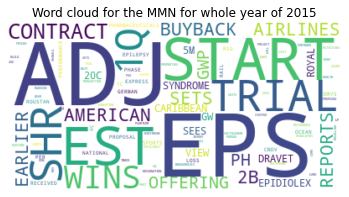

In [10]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(' '.join(df_2015[df_2015.MMN==1]['headline'].dropna()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word cloud for the MMN for whole year of 2015')
plt.axis("off")
plt.show()

In [8]:
df_2015[df_2015.MMN==1]['headline']

76762          AMERICAN AIRLINES SETS $2B BUYBACK (EARLIER).
76763          AMERICAN AIRLINES SETS $2B BUYBACK (EARLIER).
186802     HEALTH CARE REIT, REPORTS PROPOSED OFFERING OF...
192722             RUBICON PROJECT 4Q ADJ. EPS 25C, EST. 3C.
323509     GWP STARTS PH 3 TRIAL FOR EPIDIOLEX IN DRAVET ...
323510     GWP STARTS PH 3 TRIAL FOR EPIDIOLEX IN DRAVET ...
382095     ROYAL CARIBBEAN SEES 2015 ADJ. EPS 20C BELOW V...
382096     ROYAL CARIBBEAN SEES 2015 ADJ. EPS 20C BELOW V...
389324     MANHATTAN ASSOCIATES 1Q REV. $133.5M EST. $127...
457795     GW PHARMACEUTICALS STARTS PHASE 2 TRIAL OF CBD...
457796     GW PHARMACEUTICALS STARTS PHASE 2 TRIAL OF CBD...
481283     DRYS: OCEAN RIG 1Q ADJ. LOSS PER SHR 4C, EST. ...
481284     DRYS: OCEAN RIG 1Q ADJ. LOSS PER SHR 4C, EST. ...
502850     IMMUNOMEDICS GETS FAST TRACK DESIGNATION BY FD...
539832           NEOSTEM SAYS 12.5M SHARES PRICED AT $2/SHR.
581719                FLEETCOR WINS UBER FUEL CARD CONTRACT.
591067     BOBE INTENT T

## Example on all the dataset

The following datasets are extracted by function: get_bloomberg_data_one_tag_for_classification

In [ ]:
import os
import pandas as pd

# Define the directory path
directory = '/mnt/research-live/user/yzhong/Single_level_stock_MMNMMN'

# Initialize an empty list to store the filtered dataframes
dfs = []

# Iterate over the folders/files in the directory
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    
    # Check if the item is a folder
    if os.path.isdir(folder_path):
        
        # Iterate over the files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            # Check if the file is a parquet file
            if file.endswith('.parquet'):
                
                # Read the parquet file as a dataframe
                df = pd.read_parquet(file_path)
                
                # Filter the rows based on the condition
                filtered_df = df[df['MMN'] == True]
                
                # Append the filtered dataframe to the list
                dfs.append(filtered_df)

# Concatenate the filtered dataframes into a single dataframe
df_MMN = pd.concat(dfs)


In [10]:

# Return the new dataframe df_MMN
df_MMN.to_parquet('/mnt/research-live/user/yzhong/Single_level_stock_MMN.parquet')

In [12]:
df_MMN=pd.read_parquet('/mnt/research-live/user/yzhong/Single_level_stock_MMN.parquet')

In [13]:
def find_duplicates(df):
    df_copy = df.copy()
    df_copy['headline_lower'] = df_copy['headline'].str.lower()  # Convert headlines to lowercase
    regex_pattern = r'correct:|\(\d+\)\.|update\d+|\(correct\)'
    duplicates = df_copy[df_copy.duplicated(subset='headline_lower', keep='first') | df_copy['headline_lower'].str.contains(regex_pattern)]
    df_copy['duplicate'] = 0  # Initialize 'duplicates' column with 0 for all rows
    df_copy.loc[duplicates.index, 'duplicate'] = 1  # Set 'duplicates' flag to 1 for rows in the list of duplicates
    return df_copy

All the news with market moving news tag without duplicates

In [14]:
df_MMN=find_duplicates(df_MMN)

In [32]:
with open('/mnt/research-live/user/yzhong/MMN.txt', 'w') as f:
    for row in df_MMN[df_MMN.duplicate==0].itertuples():
        
        f.write(str(row.headline) + '\n')

In [15]:
df_MMN.duplicate.value_counts()

1    6425
0     608
Name: duplicate, dtype: int64

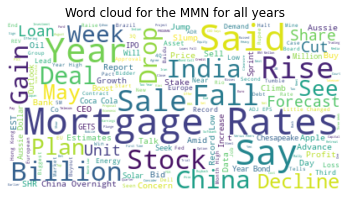

In [29]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(' '.join(df_MMN[df_MMN.duplicate==0]['headline'].dropna()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word cloud for the MMN for all years')
plt.axis("off")
plt.show()

In [31]:
df_MMN[df_MMN.duplicate==0]['headline']

8543       Bed Bath & Beyond to Review Assets Under Press...
351579     Fed ‘Independence Day’ Asset Bloodbath Isn’t O...
437004     Domino’s Shares Tumble as Pace of Sales Growth...
486605     Mega-Cap Winds Are the Only Direction That Mat...
575113     P.A.M. Transportation to Buy Back up to 200,00...
                                 ...                        
475359     Sweden’s Probi Has 13% of New Zealand’s Blis A...
739369     Fortress Agrees to Buy Real Estate Assets from...
914277     Stellantis Builds Flagship Citroen in China to...
992020     Samsung Surges After Intel Is Said to Consider...
1194151    PayPal Shares Slump as Loss of EBay Bites Hard...
Name: headline, Length: 608, dtype: object